# Analysis Report to Management 

By Valentin Voelckel

<strong> Hult International Business School </strong>

Machine Learning - DAT-5303 - VMsBA1

January 19, 2021

<h2> Case Introduction </h2>

A Machine Learning analysis to predict Revenue and Cross Sell Success for Halfway There was conducted.

<h2> Revenue </h2>

The OLS Regression Model results in an R-squared value of 0.748. 

<strong> Insights: </strong> 

<strong> 1) </strong>   Customers who ordered beverages to their meal drive Revenue. The engineered feature showcases that for every additional drink being sold to a meal, the revenue increases by 18.16%.

<strong> 2) </strong>  Customers that attended at least one masterclass are more likely to spend more on average. For every additional customer watching a masterclass, revenue goes up by almost 4%.

 
<strong> Recommendations: </strong> 

Cross-selling for beverages should be promoted more heavily. For example, the customer could be asked to add a drink to the order right before checking out. Furthermore, a campaign to promote masterclasses should be initiated. A discount on the first order for taking part in the first masterclass could be an incentive for customers.





<h2> Cross Sell Success </h2>

To evaluate important features predicting cross-sell success, several machine learning models have been performed. The Tuned Tree model most successfully resulted in an AUC of 0.732.

<strong> Insights: </strong> 

<strong> 1) </strong>   Customers who provided personal or professional emails were more likely to increase the cross-sell success than those who entered junk mail. This might result in less engagement with the platform as promotions are likely to be less seen.

<strong> 2) </strong> The Tuned Tree Model indicates that fewer cancellations lead to more cross-sell success. A goal of fewer than 1.5 cancellations before noon should be targeted.

<strong> Recommendations: </strong>

To prevent people from using junk emails, a control instance should be implemented in the sign-up phase, avoiding certain domains. With a simple feedback survey, further analysis could discover the intentions behind cancellations. 

<h2>Conclusion</h2>

We conclude that changes to increase cross-selling of beverages and implementations to enhance content consumption are predicted to raise revenue. Furthermore, the prevention of sign-ups with junk mails and the understanding of canceled orders is essential to cross-sell success.


# Appendix 

<h2> Regression Analysis</h2>

In [1]:
#importing packages
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import statsmodels.formula.api as smf # regression modeling
import numpy as np 
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scale
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects
from sklearn.linear_model import LogisticRegression  # logistic regression


# specifying file name
file = './chef_Feature_Rich.xlsx'

# reading the file into Python
chef = pd.read_excel(file)
#chef.head()

In [2]:
#Calling Regression Model
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """log_REVENUE ~  
TOTAL_MEALS_ORDERED +
CONTACTS_W_CUSTOMER_SERVICE +
AVG_TIME_PER_SITE_VISIT +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MEDIAN_MEAL_RATING +
TOTAL_PHOTOS_VIEWED +
JUNK +
PROFESSIONAL +
WILLIGNESS_NEW_PRODUCTS+
has_MASTER_CLASSES_ATTENDED+
ORDERED_BEVERAGES
""",
                  
                  
                               data = chef)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_REVENUE   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     478.6
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:36:50   Log-Likelihood:                 1601.4
No. Observations:                1946   AIC:                            -3177.
Df Residuals:                    1933   BIC:                            -3104.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.7162      0.014    189.215      0.000       2.688       2.744
TOTAL_MEALS_ORDERED             0.0019   7.35e-05     25.992      0.000       0.002       0.002
CONTACTS_W_CUSTOMER_SERVICE    -0.0010      0.001     -0.811      0.417      -0.003       0.001
AVG_TIME_PER_SITE_VISIT        -0.0002   4.06e-05     -3.892      0.000      -0.000   -7.83e-05
AVG_PREP_VID_TIME               0.0013   9.84e-05     12.850      0.000       0.001       0.001
LARGEST_ORDER_SIZE             -0.0122      0.003     -4.625      0.000      -0.017      -0.007
MEDIAN_MEAL_RATING              0.0565      0.004     13.698      0.000       0.048       0.065
TOTAL_PHOTOS_VIEWED          3.997e-05   1.55e-05      2.586      0.010    9.66e-06    7.03e-05
JUNK                            0.0067      0.007      1.026      0.305      -0.006       0.020
PROFESSIONAL                    0.0034      0.005      0.630      0.529      -0.007       0.014
WILLIGNESS_NEW_PRODUCTS        -0.1357      0.009    -15.467      0.000      -0.153      -0.118
has_MASTER_CLASSES_ATTENDED     0.0359      0.006      6.356      0.000       0.025       0.047
ORDERED_BEVERAGES               0.1816      0.008     24.112      0.000       0.167       0.196
==============================================================================
Omnibus:                      127.839   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              581.920
Skew:                          -0.044   Prob(JB):                    4.34e-127
Kurtosis:                       5.678   Cond. No.                     1.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h2>Classification Analysis - Tuned Tree Model</h2>

<span class="girk"><strong>Best Model Performance</strong></span> 


<strong>Model Name:</strong>       Tuned Tree

<strong>AUC Score:</strong>          0.7320	

<strong>Training Accuracy:</strong>  0.7402 

<strong>Testing Accuracy:</strong>   0.7762

<strong>Confusion Matrix:</strong>   (95, 61, 48, 283)

	                  	      


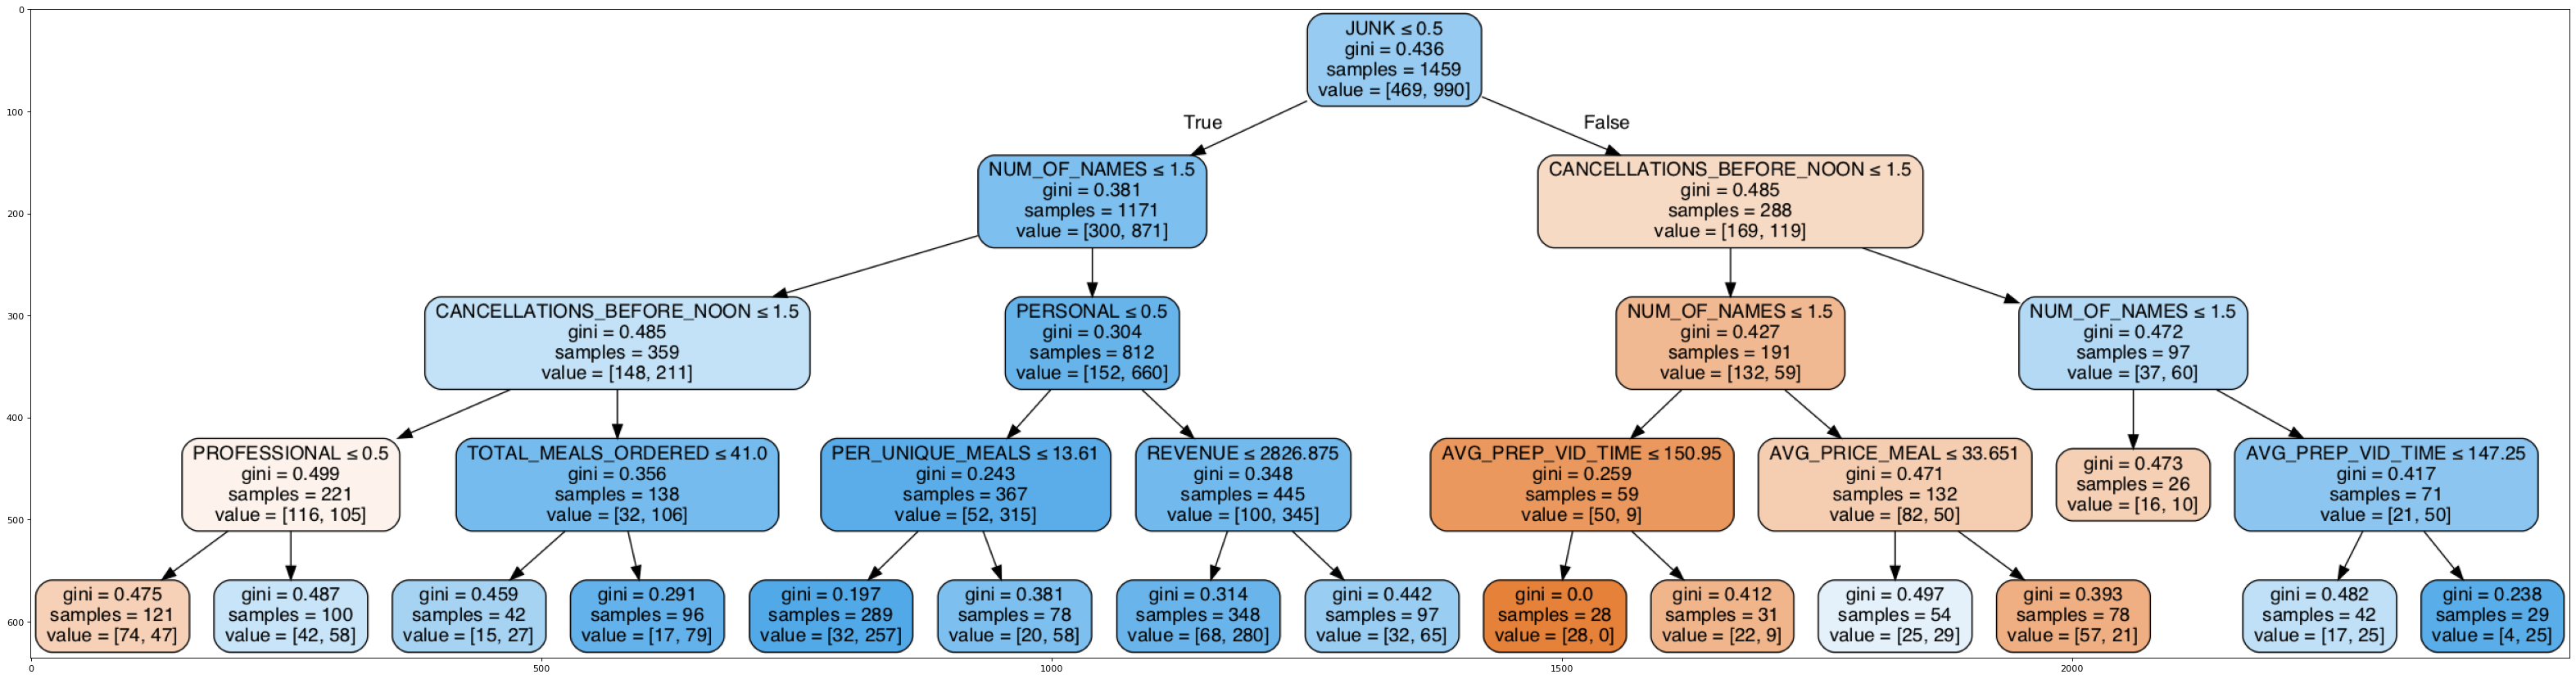

In [3]:
#Calling Decision Tree
# Python program to read  
# image using matplotlib 
  
# importing matplotlib modules 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

# Read Images 
img = mpimg.imread('tree.png') 


figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
# Output Images 
plt.imshow(img) 